In [26]:
#BLOQUE 1

from google.colab import drive
import pandas as pd
import os

# Montar Google Drive en la ruta /content/drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#BLOQUE 2

# Empezar a crear el entorno
# Sobre que lenguaje esta programado hadoop y apache spark -> Java
# Descargar Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# A continuación, instalaremos Apache Spark 3.0.1 con Hadoop 2.7 desde aquí.
!wget https://dlcdn.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz # Instalar la versión 3.3 de Hdoop
# Ahora, sólo tenemos que descomprimir esa carpeta.
!tar xf spark-3.3.3-bin-hadoop3.tgz
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" #Insalar JDK -> Entorno para apache spark
os.environ["SPARK_HOME"] = "/content/spark-3.3.3-bin-hadoop3" # Instalo directamente en el entorno ya creado
# Instalación de los paquetes necesarios
!pip install pyspark # instalo spark
!pip install findspark # combino python


--2023-12-04 23:26:15--  https://dlcdn.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299426263 (286M) [application/x-gzip]
Saving to: ‘spark-3.3.3-bin-hadoop3.tgz.1’

spark-3.3.3-bin-had 100%[===================>] 285.55M   167MB/s    in 1.7s    

2023-12-04 23:26:17 (167 MB/s) - ‘spark-3.3.3-bin-hadoop3.tgz.1’ saved [299426263/299426263]



In [ ]:
#BLOQUE 3

# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

#Lammar funciones de spark
import findspark
findspark.init()

# sql me toma datos de secual -> extrayendo informacion
from pyspark.sql import SparkSession
from pyspark.sql import functions as fct


---
#MANIZALES
---

##Variables meteorologicas

###Marzo

In [27]:
#BLOQUE 4

ruta_marzo_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/MARZO/Meteo 2022-03-'

datos_marzo_MA = {}  # Diccionario para almacenar los datos de marzo

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_marzo_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"marzo{i}_MA"
        datos_marzo_MA[nombre_variable] = pd.read_excel(ruta)
        datos_marzo_MA[nombre_variable] = datos_marzo_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de marzo.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_marzo_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")


lista_marzo_MA = [valor for valor in datos_marzo_MA.values()]
datos_concatenados_marzo_MA = pd.concat(lista_marzo_MA)
print(datos_concatenados_marzo_MA)


Conjunto de datos: marzo1_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-03-01  00:05:00  00:04:59.808000         0.0
1 2022-03-01  00:06:00  00:06:00.288000         0.0
2 2022-03-01  00:07:00  00:06:59.904000         0.0
3 2022-03-01  00:08:00  00:08:00.384000         0.0
4 2022-03-01  00:09:00         00:09:00         0.0


Conjunto de datos: marzo2_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-03-02  00:00:00         00:00:00         0.0
1 2022-03-02  00:01:00  00:00:59.616000         0.0
2 2022-03-02  00:02:00  00:02:00.096000         0.0
3 2022-03-02  00:03:00  00:02:59.712000         0.0
4 2022-03-02  00:04:00  00:04:00.192000         0.0


Conjunto de datos: marzo3_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-03-03  00:00:00         00:00:00         0.0
1 2022-03-03  00:01:00  00:00:59.616000         0.0
2 2022-03-03  00:02:00  00:02:00.096000         0.0
3 2022-03-03  00:03:00  00:02:59.712000         0.0
4 2022-03-03  00:04:00  0

###Abril

In [28]:
#BLOQUE 5

ruta_abril_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/ABRIL/Meteo 2022-04-'

datos_abril_MA = {}  # Diccionario para almacenar los datos de abril

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_abril_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"abril{i}_MA"
        datos_abril_MA[nombre_variable] = pd.read_excel(ruta)
        datos_abril_MA[nombre_variable] = datos_abril_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de abril.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_abril_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")


lista_abril_MA = [valor for valor in datos_abril_MA.values()]
datos_concatenados_abril_MA = pd.concat(lista_abril_MA)
print(datos_concatenados_abril_MA)


No se encontró el archivo para el día 1 de abril.
No se encontró el archivo para el día 2 de abril.
No se encontró el archivo para el día 3 de abril.
No se encontró el archivo para el día 4 de abril.
No se encontró el archivo para el día 15 de abril.
No se encontró el archivo para el día 16 de abril.
No se encontró el archivo para el día 17 de abril.
No se encontró el archivo para el día 18 de abril.
No se encontró el archivo para el día 19 de abril.
No se encontró el archivo para el día 30 de abril.
Conjunto de datos: abril5_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-04-05  15:20:00  15:20:00.096000      465.00
1 2022-04-05  15:21:00  15:20:59.712000      507.75
2 2022-04-05  15:22:00  15:22:00.192000      551.12
3 2022-04-05  15:23:00  15:22:59.808000      593.88
4 2022-04-05  15:24:00  15:24:00.288000      637.25


Conjunto de datos: abril6_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-04-06  00:00:00         00:00:00         0.0
1 2022-04-06  00:0

###Mayo
Se esta leyendo la columna Solar Rad como si estuviera nula, y manda otra columna por alla llamada Solar Ra..1 que no se sabe de donde andara saliendo y en esa si estan los datos

In [29]:
#BLOQUE 6

ruta_mayo_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/MAYO/Meteo 2022-05-'

datos_mayo_MA = {}  # Diccionario para almacenar los datos de mayo

for i in range(1, 32):  # Cambia el rango según los días del mes
    ruta = ruta_mayo_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"mayo{i}_MA"
        datos_mayo_MA[nombre_variable] = pd.read_excel(ruta)
        datos_mayo_MA[nombre_variable] = datos_mayo_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad..1"]]
    else:
        print(f"No se encontró el archivo para el día {i} de mayo.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_mayo_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_mayo_MA = [valor for valor in datos_mayo_MA.values()]
datos_concatenados_mayo_MA = pd.concat(lista_mayo_MA)
print(datos_concatenados_mayo_MA)


No se encontró el archivo para el día 1 de mayo.
No se encontró el archivo para el día 2 de mayo.
No se encontró el archivo para el día 6 de mayo.
No se encontró el archivo para el día 7 de mayo.
No se encontró el archivo para el día 8 de mayo.
No se encontró el archivo para el día 12 de mayo.
No se encontró el archivo para el día 13 de mayo.
No se encontró el archivo para el día 14 de mayo.
No se encontró el archivo para el día 15 de mayo.
No se encontró el archivo para el día 16 de mayo.
No se encontró el archivo para el día 17 de mayo.
No se encontró el archivo para el día 18 de mayo.
No se encontró el archivo para el día 19 de mayo.
No se encontró el archivo para el día 20 de mayo.
No se encontró el archivo para el día 24 de mayo.
No se encontró el archivo para el día 28 de mayo.
No se encontró el archivo para el día 29 de mayo.
Conjunto de datos: mayo3_MA
        Date      Time      Time aprox.  Solar Rad..1
0 2022-05-03  22:33:00  22:32:59.712000             0
1 2022-05-03  22:34

###Junio

In [30]:
#BLOQUE 7

ruta_junio_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/JUNIO/Meteo 2022-06-'

datos_junio_MA = {}  # Diccionario para almacenar los datos de junio

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_junio_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"junio{i}_MA"
        datos_junio_MA[nombre_variable] = pd.read_excel(ruta)
        datos_junio_MA[nombre_variable] = datos_junio_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de junio.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_junio_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_junio_MA = [valor for valor in datos_junio_MA.values()]
datos_concatenados_junio_MA = pd.concat(lista_junio_MA)
print(datos_concatenados_junio_MA)


No se encontró el archivo para el día 9 de junio.
No se encontró el archivo para el día 10 de junio.
No se encontró el archivo para el día 11 de junio.
Conjunto de datos: junio1_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-06-01  00:00:00         00:00:00         0.0
1 2022-06-01  00:01:00  00:00:59.616000         0.0
2 2022-06-01  00:02:00  00:02:00.096000         0.0
3 2022-06-01  00:03:00  00:02:59.712000         0.0
4 2022-06-01  00:04:00  00:04:00.192000         0.0


Conjunto de datos: junio2_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-06-02  00:00:00         00:00:00         0.0
1 2022-06-02  00:01:00  00:00:59.616000         0.0
2 2022-06-02  00:02:00  00:02:00.096000         0.0
3 2022-06-02  00:03:00  00:02:59.712000         0.0
4 2022-06-02  00:04:00  00:04:00.192000         0.0


Conjunto de datos: junio3_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-06-03  00:00:00         00:00:00         0.0
1 2022-06-03  00:01:00  00:00

###Julio

In [31]:
#BLOQUE 8

ruta_julio_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/JULIO/Meteo 2022-07-'

datos_julio_MA = {}  # Diccionario para almacenar los datos de julio

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_julio_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"julio{i}_MA"
        datos_julio_MA[nombre_variable] = pd.read_excel(ruta)
        datos_julio_MA[nombre_variable] = datos_julio_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de julio.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_julio_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_julio_MA = [valor for valor in datos_julio_MA.values()]
datos_concatenados_julio_MA = pd.concat(lista_julio_MA)
print(datos_concatenados_julio_MA)


No se encontró el archivo para el día 10 de julio.
No se encontró el archivo para el día 11 de julio.
No se encontró el archivo para el día 12 de julio.
Conjunto de datos: julio1_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-07-01  00:00:00         00:00:00         0.0
1 2022-07-01  00:01:00  00:00:59.616000         0.0
2 2022-07-01  00:02:00  00:02:00.096000         0.0
3 2022-07-01  00:03:00  00:02:59.712000         0.0
4 2022-07-01  00:04:00  00:04:00.192000         0.0


Conjunto de datos: julio2_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-07-02  00:00:00         00:00:00         0.0
1 2022-07-02  00:01:00  00:00:59.616000         0.0
2 2022-07-02  00:02:00  00:02:00.096000         0.0
3 2022-07-02  00:03:00  00:02:59.712000         0.0
4 2022-07-02  00:04:00  00:04:00.192000         0.0


Conjunto de datos: julio3_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-07-03  00:00:00         00:00:00         0.0
1 2022-07-03  00:01:00  00:0

###Agosto

In [32]:

ruta_agosto_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/AGOSTO/Meteo 2022-08-'

datos_agosto_MA = {}  # Diccionario para almacenar los datos de agosto

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_agosto_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"agosto{i}_MA"
        datos_agosto_MA[nombre_variable] = pd.read_excel(ruta)
        datos_agosto_MA[nombre_variable] = datos_agosto_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de agosto.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_agosto_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_agosto_MA = [valor for valor in datos_agosto_MA.values()]
datos_concatenados_agosto_MA = pd.concat(lista_agosto_MA)
print(datos_concatenados_agosto_MA)


Conjunto de datos: agosto1_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-08-01  00:00:00         00:00:00         0.0
1 2022-08-01  00:01:00  00:00:59.616000         0.0
2 2022-08-01  00:02:00  00:02:00.096000         0.0
3 2022-08-01  00:03:00  00:02:59.712000         0.0
4 2022-08-01  00:04:00  00:04:00.192000         0.0


Conjunto de datos: agosto2_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-08-02  00:00:00         00:00:00         0.0
1 2022-08-02  00:01:00  00:00:59.616000         0.0
2 2022-08-02  00:02:00  00:02:00.096000         0.0
3 2022-08-02  00:03:00  00:02:59.712000         0.0
4 2022-08-02  00:04:00  00:04:00.192000         0.0


Conjunto de datos: agosto3_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-08-03  00:00:00         00:00:00         0.0
1 2022-08-03  00:01:00  00:00:59.616000         0.0
2 2022-08-03  00:02:00  00:02:00.096000         0.0
3 2022-08-03  00:03:00  00:02:59.712000         0.0
4 2022-08-03  00:04:00

###Septiembre

In [33]:

ruta_septiembre_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/SEPTIEMBRE/Meteo 2022-09-'

datos_septiembre_MA = {}  # Diccionario para almacenar los datos de septiembre

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_septiembre_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"septiembre{i}_MA"
        datos_septiembre_MA[nombre_variable] = pd.read_excel(ruta)
        datos_septiembre_MA[nombre_variable] = datos_septiembre_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de septiembre.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_septiembre_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_septiembre_MA = [valor for valor in datos_septiembre_MA.values()]
datos_concatenados_septiembre_MA = pd.concat(lista_septiembre_MA)
print(datos_concatenados_septiembre_MA)


No se encontró el archivo para el día 10 de septiembre.
No se encontró el archivo para el día 20 de septiembre.
No se encontró el archivo para el día 21 de septiembre.
No se encontró el archivo para el día 22 de septiembre.
No se encontró el archivo para el día 23 de septiembre.
Conjunto de datos: septiembre1_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-09-01  00:00:00         00:00:00         0.0
1 2022-09-01  00:01:00  00:00:59.616000         0.0
2 2022-09-01  00:02:00  00:02:00.096000         0.0
3 2022-09-01  00:03:00  00:02:59.712000         0.0
4 2022-09-01  00:04:00  00:04:00.192000         0.0


Conjunto de datos: septiembre2_MA
        Date      Time      Time aprox.  Solar Rad.
0 2022-09-02  00:00:00         00:00:00         0.0
1 2022-09-02  00:01:00  00:00:59.616000         0.0
2 2022-09-02  00:02:00  00:02:00.096000         0.0
3 2022-09-02  00:03:00  00:02:59.712000         0.0
4 2022-09-02  00:04:00  00:04:00.192000         0.0


Conjunto de datos: septi

In [ ]:
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
valor_promedio_radiacion1 = datos_concatenados_marzo_MA['Solar Rad.'].mean()
valor_promedio_radiacion2 = datos_concatenados_abril_MA['Solar Rad.'].mean()
valor_promedio_radiacion3 = datos_concatenados_mayo_MA['Solar Rad..1'].mean()
valor_promedio_radiacion4 = datos_concatenados_junio_MA['Solar Rad.'].mean()
valor_promedio_radiacion5 = datos_concatenados_julio_MA['Solar Rad.'].mean()
valor_promedio_radiacion6 = datos_concatenados_agosto_MA['Solar Rad.'].mean()
valor_promedio_radiacion7 = datos_concatenados_septiembre_MA['Solar Rad.'].mean()

promedioTotal = (valor_promedio_radiacion1 + valor_promedio_radiacion2 + valor_promedio_radiacion3 + valor_promedio_radiacion4 + valor_promedio_radiacion5 + valor_promedio_radiacion6 + valor_promedio_radiacion7)/7

print(f"El valor promedio de radiación solar es: {promedioTotal}")

El valor promedio de radiación solar es: 142.73597569691086


##Heat pipe

In [ ]:
#BLOQUE 9
# Sistema heatpipe
ruta_data_HP_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/11. heat pipe/heat pipe data.csv'
#ruta_data_HP_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/11. heat pipe/heat 2022-08-11.xlsx'

data_HP_MA = pd.read_csv(ruta_data_HP_MA)

data_HP_MA['Fecha'] = pd.to_datetime(data_HP_MA['Fecha'])

data_HP_MA

,ID,Sistema,TT1,TT2,TT3,PT1,PT2,FT1,Fecha,Hora,Unnamed: 10
0,516887,heatpipe,25.37,25.31,34.13,71.32,71.00,0.0,2022-12-16,23:23:34,NaN
1,516886,heatpipe,25.37,25.31,34.13,71.69,70.58,0.0,2022-12-16,23:22:50,NaN
2,516885,heatpipe,25.37,25.37,34.13,71.95,71.42,0.0,2022-12-16,23:22:05,NaN
3,516884,heatpipe,25.37,25.37,34.13,72.21,71.16,0.0,2022-12-16,23:21:20,NaN
4,516883,heatpipe,25.44,25.37,34.13,71.95,71.00,0.0,2022-12-16,23:20:36,NaN
...,...,...,...,...,...,...,...,...,...,...,...
516882,5,Chec2,-127.00,-196.60,-127.00,-127.00,NaN,NaN,2021-11-03,23:31:07,NaN
516883,4,Chec2,-127.00,-196.60,-127.00,-127.00,NaN,NaN,2021-11-03,23:30:35,NaN
516884,3,Chec2,-127.00,-196.60,-127.00,-127.00,NaN,NaN,2021-11-03,23:30:03,NaN
516885,2,Chec2,-127.00,-196.60,-127.00,-127.00,NaN,NaN,2021-11-03,23:29:31,NaN


In [ ]:
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_HP_MA['TT1'].mean())
print(data_HP_MA['TT2'].mean())
print(data_HP_MA['TT3'].mean())
print(data_HP_MA['PT1'].mean())
print(data_HP_MA['PT2'].mean())
print(data_HP_MA['FT1'].mean())



18.188064760769763
20.815051665064118
44.22205129941361
51.45489373886361
33419.76826163082
0.036729264475743345


##Flat plate

In [ ]:
#BLOQUE 10
# Sistema placaplana
ruta_data_FP_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/12. flat plate/flat plate data.csv'

data_FP_MA = pd.read_csv(ruta_data_FP_MA)

data_FP_MA


,ID,Sistema,TT1,TT2,TT3,TT4,PT1,PT2,PT3,FT1,Fecha,Hora,Unnamed: 12
0,467645,placaplana,26.25,26.50,25.56,28.69,73.22,66.31,69.16,0.0,2022-12-17,21:51:42,NaN
1,467644,placaplana,26.25,26.56,25.56,28.69,73.27,66.79,69.10,0.0,2022-12-17,21:50:54,NaN
2,467643,placaplana,26.25,26.56,25.56,28.75,73.27,66.68,69.68,0.0,2022-12-17,21:50:05,NaN
3,467642,placaplana,26.25,26.56,25.56,28.75,73.74,66.89,69.47,0.0,2022-12-17,21:49:16,NaN
4,467641,placaplana,26.31,26.56,25.50,28.75,74.06,67.15,69.37,0.0,2022-12-17,21:48:27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467640,5,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.60,-127.00,-196.6,2021-11-04,12:04:04,NaN
467641,4,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.60,-127.00,-196.6,2021-11-03,22:21:58,NaN
467642,3,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.60,-127.00,-196.6,2021-11-03,22:21:08,NaN
467643,2,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.60,-127.00,-196.6,2021-11-03,21:47:14,NaN


In [ ]:
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_FP_MA['TT1'].mean())
print(data_FP_MA['TT2'].mean())
print(data_FP_MA['TT3'].mean())
print(data_FP_MA['TT4'].mean())

print(data_FP_MA['PT1'].mean())
print(data_FP_MA['PT2'].mean())
print(data_FP_MA['PT3'].mean())

print(data_FP_MA['FT1'].mean())



16.450919757508366
21.332021127137036
32.31526403575361
25.912354970116212
45.430839482941124
44.694789017310136
47.021238375263295
28713.616864416384


##Mariposa

In [ ]:
#BLOQUE 11
# Sistema tubovaciocp
ruta_data_M_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/21. mariposa/mariposa data.csv'

data_M_MA = pd.read_csv(ruta_data_M_MA)

data_M_MA


,ID,Sistema,TT1,TT2,TT3,PT1,PT2,FT1,LS1,Fecha,Hora,Unnamed: 11
0,378719,tubovaciocp,26.81,26.37,35.19,7.59,-3.95,9.0,1.0,2022-12-17,21:54:34,NaN
1,378718,tubovaciocp,26.81,26.37,35.13,6.48,-3.11,9.0,1.0,2022-12-17,21:53:47,NaN
2,378717,tubovaciocp,26.81,26.37,35.13,6.91,-3.69,9.0,1.0,2022-12-17,21:53:01,NaN
3,378716,tubovaciocp,26.87,26.37,35.13,5.85,-4.01,9.0,1.0,2022-12-17,21:52:14,NaN
4,378715,tubovaciocp,26.87,26.37,35.31,6.91,-4.06,9.0,1.0,2022-12-17,21:51:27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
378714,5,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:29:34,NaN
378715,4,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:28:46,NaN
378716,3,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:27:39,NaN
378717,2,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:26:52,NaN


In [ ]:
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_M_MA['TT1'].mean())
print(data_M_MA['TT2'].mean())
print(data_M_MA['TT3'].mean())
#print(data_FP_MA['TT4'].mean())

print(data_M_MA['PT1'].mean())
print(data_M_MA['PT2'].mean())
#print(data_M_MA['PT3'].mean())

print(data_M_MA['FT1'].mean())



20.20124704596284
22.001986353998618
24.750902067231902
3.6985679619982093
-3.4662175914068203
68832.94820011672


##Polipropileno

In [ ]:
#BLOQUE 12
# Sistema polipropileno

ruta_data_P_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/22. polipropileno/poliprop data.csv'

data_P_MA = pd.read_csv(ruta_data_P_MA)

data_P_MA


,ID,Sistema,TT1,TT2,TT3,PT1,PT2,FT1,LS1,Fecha,Hora,Unnamed: 11
0,378543,polipropileno,26.25,26.0,32.69,-3.74,-3.74,0.0,1.0,2022-12-17,21:53:45,NaN
1,378542,polipropileno,26.25,26.0,32.69,-4.27,-3.00,0.0,1.0,2022-12-17,21:52:59,NaN
2,378541,polipropileno,26.25,26.0,32.81,-4.22,-3.37,0.0,1.0,2022-12-17,21:52:13,NaN
3,378540,polipropileno,26.31,26.0,32.81,-4.53,-3.90,0.0,1.0,2022-12-17,21:51:26,NaN
4,378539,polipropileno,26.25,26.0,32.88,-4.27,-4.06,0.0,1.0,2022-12-17,21:50:40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
378538,5,Chec4,-127.00,0.0,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:59:09,NaN
378539,4,Chec4,-127.00,0.0,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:58:21,NaN
378540,3,Chec4,-127.00,0.0,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:57:34,NaN
378541,2,Chec4,-127.00,0.0,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:52:52,NaN


In [ ]:
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_P_MA['TT1'].mean())
print(data_P_MA['TT2'].mean())
print(data_P_MA['TT3'].mean())
#print(data_FP_MA['TT4'].mean())

print(data_P_MA['PT1'].mean())
print(data_P_MA['PT2'].mean())
#print(data_M_MA['PT3'].mean())

print(data_P_MA['FT1'].mean())



18.539713401119563
19.8204725222762
23.59266017334887
-3.8984910036640485
-3.791456135762647
5196.899197713337


##Anexo sistema con meteorologicas

In [ ]:
# Importar librerías necesarias
from pyspark.sql import SparkSession

# Crear la sesión de Spark
spark = SparkSession.builder.appName("Nombre de tu app").getOrCreate()

# Crear DataFrames de Spark
datos_concatenados_marzo_MA_spark = spark.createDataFrame(datos_concatenados_marzo_MA)

# Convertir la columna 'Fecha' al tipo datetime en el DataFrame de Pandas
data_HP_MA['Fecha'] = pd.to_datetime(data_HP_MA['Fecha'])

# Crear DataFrame de Spark desde el DataFrame de Pandas actualizado
data_HP_MA_spark = spark.createDataFrame(data_HP_MA)

# Unir los DataFrames utilizando la columna 'Fecha' como clave
# Puedes utilizar uno de los métodos de join (inner, left, right, etc.) según sea necesario
resultado_join = datos_concatenados_marzo_MA_spark.join(data_HP_MA_spark, on='Fecha', how='inner')

# Continuar con operaciones adicionales si es necesario

# Detener la sesión de Spark al terminar
spark.stop()


/content/spark-3.3.3-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/content/spark-3.3.3-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


AttributeError: ignored

##Añadir y calcular columna con formula de eficiencia

In [ ]:
# Añadir columna con formula

##Modelo o Dashboard de visualización?

In [ ]:
# Toca revisar si puede haber algun modo de realizar algun modelo o un dashboward, volverlo objetivo

---
#LA DORADA
---

##Variables meteorologicas

###Enero

In [34]:

ruta_enero_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/30.meteo-directodelaestación/MeteorologicosLaDorada/Datos extrapolados/ENERO/Meteo 2023-01-'

datos_enero_LD = {}  # Diccionario para almacenar los datos de enero

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_enero_LD + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"enero{i}_LD"
        datos_enero_LD[nombre_variable] = pd.read_excel(ruta)
        datos_enero_LD[nombre_variable] = datos_enero_LD[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de enero.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_enero_LD.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_enero_LD = [valor for valor in datos_enero_LD.values()]
datos_concatenados_enero_LD = pd.concat(lista_enero_LD)
print(datos_concatenados_enero_LD)


No se encontró el archivo para el día 1 de enero.
No se encontró el archivo para el día 2 de enero.
No se encontró el archivo para el día 3 de enero.
No se encontró el archivo para el día 17 de enero.
No se encontró el archivo para el día 18 de enero.
No se encontró el archivo para el día 19 de enero.
No se encontró el archivo para el día 20 de enero.
No se encontró el archivo para el día 21 de enero.
No se encontró el archivo para el día 22 de enero.
No se encontró el archivo para el día 23 de enero.
No se encontró el archivo para el día 24 de enero.
No se encontró el archivo para el día 25 de enero.
No se encontró el archivo para el día 26 de enero.
No se encontró el archivo para el día 27 de enero.
No se encontró el archivo para el día 28 de enero.
No se encontró el archivo para el día 29 de enero.
No se encontró el archivo para el día 30 de enero.
Conjunto de datos: enero4_LD
        Date      Time      Time aprox.  Solar Rad.
0 2023-01-04  00:00:00         00:00:00         0.0
1 2

###Febrero
NO HAY DATOS EN FEBRERO

In [ ]:

ruta_febrero_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/30.meteo-directodelaestación/MeteorologicosLaDorada/Datos extrapolados/ENERO/Meteo 2023-01-'

datos_febrero_LD = {}  # Diccionario para almacenar los datos de febrero

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_febrero_LD + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"febrero{i}_LD"
        datos_febrero_LD[nombre_variable] = pd.read_excel(ruta)
        datos_febrero_LD[nombre_variable] = datos_febrero_LD[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de febrero.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_febrero_LD.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")


###Marzo

In [35]:

ruta_marzo_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/30.meteo-directodelaestación/MeteorologicosLaDorada/Datos extrapolados/MARZO/Meteo 2023-03-'

datos_marzo_LD = {}  # Diccionario para almacenar los datos de marzo

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_marzo_LD + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"marzo{i}_LD"
        datos_marzo_LD[nombre_variable] = pd.read_excel(ruta)
        datos_marzo_LD[nombre_variable] = datos_marzo_LD[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de marzo.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_marzo_LD.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_marzo_LD = [valor for valor in datos_marzo_LD.values()]
datos_concatenados_marzo_LD = pd.concat(lista_marzo_LD)
print(datos_concatenados_marzo_LD)


No se encontró el archivo para el día 1 de marzo.
No se encontró el archivo para el día 2 de marzo.
No se encontró el archivo para el día 3 de marzo.
No se encontró el archivo para el día 16 de marzo.
No se encontró el archivo para el día 17 de marzo.
No se encontró el archivo para el día 18 de marzo.
No se encontró el archivo para el día 19 de marzo.
No se encontró el archivo para el día 30 de marzo.
Conjunto de datos: marzo4_LD
        Date      Time      Time aprox.  Solar Rad.
0 2023-03-04  00:00:00         00:00:00           0
1 2023-03-04  00:01:00  00:00:59.616000           0
2 2023-03-04  00:02:00  00:02:00.096000           0
3 2023-03-04  00:03:00  00:02:59.712000           0
4 2023-03-04  00:04:00  00:04:00.192000           0


Conjunto de datos: marzo5_LD
        Date      Time      Time aprox.  Solar Rad.
0 2023-03-05  00:00:00         00:00:00         0.0
1 2023-03-05  00:01:00  00:00:59.616000         0.0
2 2023-03-05  00:02:00  00:02:00.096000         0.0
3 2023-03-05  0

###Abril

In [36]:

ruta_abril_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/30.meteo-directodelaestación/MeteorologicosLaDorada/Datos extrapolados/ABRIL/Meteo 2023-04-'

datos_abril_LD = {}  # Diccionario para almacenar los datos de abril

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_abril_LD + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"abril{i}_LD"
        datos_abril_LD[nombre_variable] = pd.read_excel(ruta)
        datos_abril_LD[nombre_variable] = datos_abril_LD[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de abril.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_abril_LD.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_abril_LD = [valor for valor in datos_abril_LD.values()]
datos_concatenados_abril_LD = pd.concat(lista_abril_LD)
print(datos_concatenados_abril_LD)


No se encontró el archivo para el día 18 de abril.
No se encontró el archivo para el día 29 de abril.
Conjunto de datos: abril1_LD
        Date      Time      Time aprox.  Solar Rad.
0 2023-04-01  00:00:00         00:00:00         0.0
1 2023-04-01  00:01:00  00:00:59.616000         0.0
2 2023-04-01  00:02:00  00:02:00.096000         0.0
3 2023-04-01  00:03:00  00:02:59.712000         0.0
4 2023-04-01  00:04:00  00:04:00.192000         0.0


Conjunto de datos: abril2_LD
        Date      Time      Time aprox.  Solar Rad.
0 2023-04-02  00:00:00         00:00:00         0.0
1 2023-04-02  00:01:00  00:00:59.616000         0.0
2 2023-04-02  00:02:00  00:02:00.096000         0.0
3 2023-04-02  00:03:00  00:02:59.712000         0.0
4 2023-04-02  00:04:00  00:04:00.192000         0.0


Conjunto de datos: abril3_LD
        Date      Time      Time aprox.  Solar Rad.
0 2023-04-03  00:00:00         00:00:00         0.0
1 2023-04-03  00:01:00  00:00:59.616000         0.0
2 2023-04-03  00:02:00  00:

###Mayo

In [37]:

ruta_mayo_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/30.meteo-directodelaestación/MeteorologicosLaDorada/Datos extrapolados/MAYO/Meteo 2023-05-'

datos_mayo_LD = {}  # Diccionario para almacenar los datos de mayo

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_mayo_LD + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"mayo{i}_LD"
        datos_mayo_LD[nombre_variable] = pd.read_excel(ruta)
        datos_mayo_LD[nombre_variable] = datos_mayo_LD[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de mayo.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_mayo_LD.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_mayo_LD = [valor for valor in datos_mayo_LD.values()]
datos_concatenados_mayo_LD = pd.concat(lista_mayo_LD)
print(datos_concatenados_mayo_LD)


No se encontró el archivo para el día 26 de mayo.
No se encontró el archivo para el día 27 de mayo.
No se encontró el archivo para el día 28 de mayo.
No se encontró el archivo para el día 29 de mayo.
No se encontró el archivo para el día 30 de mayo.
Conjunto de datos: mayo1_LD
        Date      Time      Time aprox.  Solar Rad.
0 2023-05-01  00:00:00         00:00:00         0.0
1 2023-05-01  00:01:00  00:00:59.616000         0.0
2 2023-05-01  00:02:00  00:02:00.096000         0.0
3 2023-05-01  00:03:00  00:02:59.712000         0.0
4 2023-05-01  00:04:00  00:04:00.192000         0.0


Conjunto de datos: mayo2_LD
        Date      Time      Time aprox.  Solar Rad.
0 2023-05-02  00:00:00         00:00:00         0.0
1 2023-05-02  00:01:00  00:00:59.616000         0.0
2 2023-05-02  00:02:00  00:02:00.096000         0.0
3 2023-05-02  00:03:00  00:02:59.712000         0.0
4 2023-05-02  00:04:00  00:04:00.192000         0.0


Conjunto de datos: mayo3_LD
        Date      Time      Time aprox

In [12]:
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
valor_promedio_radiacion1 = datos_concatenados_enero_LD['Solar Rad.'].mean()
valor_promedio_radiacion2 = datos_concatenados_marzo_LD['Solar Rad.'].mean()
valor_promedio_radiacion3 = datos_concatenados_abril_LD['Solar Rad.'].mean()
valor_promedio_radiacion4 = datos_concatenados_mayo_LD['Solar Rad.'].mean()

promedioTotal = (valor_promedio_radiacion1 + valor_promedio_radiacion2 + valor_promedio_radiacion3 + valor_promedio_radiacion4)/4

print(f"El valor promedio de radiación solar es: {promedioTotal}")

El valor promedio de radiación solar es: 169.59536184731934


##Heat pipe

In [14]:
#BLOQUE 9
# Sistema heatpipe
ruta_data_HP_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/11. heat pipe/heat pipe data.csv'
#ruta_data_HP_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/11. heat pipe/heat 2022-08-11.xlsx'

data_HP_LD = pd.read_csv(ruta_data_HP_LD)

data_HP_LD['Fecha'] = pd.to_datetime(data_HP_LD['Fecha'])

data_HP_LD

,ID,Sistema,TT1,TT2,TT3,PT1,PT2,FT1,Fecha,Hora,Unnamed: 10
0,663142,heatpipe,31.62,37.00,35.69,46.23,84.71,0.00,2023-07-19,15:32:44,NaN
1,663141,heatpipe,31.62,37.00,35.69,45.86,85.13,0.03,2023-07-19,15:31:59,NaN
2,663140,heatpipe,31.62,37.06,35.69,45.07,85.71,0.00,2023-07-19,15:31:14,NaN
3,663139,heatpipe,31.62,37.06,35.69,44.91,86.29,0.00,2023-07-19,15:30:29,NaN
4,663138,heatpipe,31.62,37.13,35.63,44.54,84.87,0.00,2023-07-19,15:29:44,NaN
...,...,...,...,...,...,...,...,...,...,...,...
663137,5,Chec2,-127.00,-196.60,-127.00,-127.00,NaN,NaN,2021-11-03,23:31:07,NaN
663138,4,Chec2,-127.00,-196.60,-127.00,-127.00,NaN,NaN,2021-11-03,23:30:35,NaN
663139,3,Chec2,-127.00,-196.60,-127.00,-127.00,NaN,NaN,2021-11-03,23:30:03,NaN
663140,2,Chec2,-127.00,-196.60,-127.00,-127.00,NaN,NaN,2021-11-03,23:29:31,NaN


In [15]:
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_HP_LD['TT1'].mean())
print(data_HP_LD['TT2'].mean())
print(data_HP_LD['TT3'].mean())
print(data_HP_LD['PT1'].mean())
print(data_HP_LD['PT2'].mean())
print(data_HP_LD['FT1'].mean())



20.333309155505162
22.512789779564553
41.699727373624356
50.606086901447966
26060.44544791717
0.09361224489795919


##Flat plate

In [17]:
#BLOQUE 10
# Sistema placaplana
ruta_data_FP_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/12. flat plate/flat plate data.csv'

data_FP_LD = pd.read_csv(ruta_data_FP_LD)

data_FP_LD


,ID,Sistema,TT1,TT2,TT3,TT4,PT1,PT2,PT3,FT1,Fecha,Hora,Unnamed: 12
0,642923,placaplana,26.12,28.75,33.31,27.62,58.77,53.40,54.08,0.0,2023-04-21,17:23:39,NaN
1,642922,placaplana,26.12,28.81,33.38,27.62,58.14,53.98,53.71,0.0,2023-04-21,17:22:50,NaN
2,642921,placaplana,26.12,28.87,33.50,27.69,58.19,53.19,53.82,0.0,2023-04-21,17:22:02,NaN
3,642920,placaplana,26.12,28.87,33.69,27.69,57.93,52.55,53.45,0.0,2023-04-21,17:21:13,NaN
4,642919,placaplana,26.12,28.94,33.81,27.69,57.40,52.82,53.71,0.0,2023-04-21,17:20:24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642918,5,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.60,-127.00,-196.6,2021-11-04,12:04:04,NaN
642919,4,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.60,-127.00,-196.6,2021-11-03,22:21:58,NaN
642920,3,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.60,-127.00,-196.6,2021-11-03,22:21:08,NaN
642921,2,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.60,-127.00,-196.6,2021-11-03,21:47:14,NaN


In [19]:
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_FP_LD['TT1'].mean())
print(data_FP_LD['TT2'].mean())
print(data_FP_LD['TT3'].mean())
print(data_FP_LD['TT4'].mean())

print(data_FP_LD['PT1'].mean())
print(data_FP_LD['PT2'].mean())
print(data_FP_LD['PT3'].mean())

print(data_FP_LD['FT1'].mean())



19.30650018742525
23.128289453013817
37.39549294394509
29.349425981027277
47.0304272051241
46.48466016925821
48.61787472216735
20885.521703314396


##Mariposa

In [20]:
#BLOQUE 11
# Sistema tubovaciocp
ruta_data_M_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/21. mariposa/mariposa data.csv'

data_M_LD = pd.read_csv(ruta_data_M_LD)

data_M_LD


,ID,Sistema,TT1,TT2,TT3,PT1,PT2,FT1,LS1,Fecha,Hora,Unnamed: 11
0,560814,polipropileno,28.00,27.37,29.81,-4.38,-3.64,558.0,1.0,2023-04-21,17:23:52,NaN
1,560813,polipropileno,28.00,27.44,29.81,-4.43,-3.48,558.0,1.0,2023-04-21,17:23:06,NaN
2,560812,polipropileno,28.00,27.44,29.75,-4.22,-3.48,558.0,1.0,2023-04-21,17:22:19,NaN
3,560811,polipropileno,28.06,27.44,29.75,-4.27,-3.53,558.0,1.0,2023-04-21,17:21:33,NaN
4,560810,polipropileno,28.06,27.50,29.87,-3.69,-3.37,558.0,1.0,2023-04-21,17:20:47,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
560809,5,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:59:09,NaN
560810,4,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:58:21,NaN
560811,3,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:57:34,NaN
560812,2,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:52:52,NaN


In [21]:
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_M_LD['TT1'].mean())
print(data_M_LD['TT2'].mean())
print(data_M_LD['TT3'].mean())
#print(data_FP_MA['TT4'].mean())

print(data_M_LD['PT1'].mean())
print(data_M_LD['PT2'].mean())
#print(data_M_MA['PT3'].mean())

print(data_M_LD['FT1'].mean())



22.079808385667977
23.07714942922253
24.736268388449655
-3.972426009336428
-3.6952057544925765
4032.0656099883386


##Polipropileno

In [22]:
#BLOQUE 12
# Sistema polipropileno

ruta_data_P_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/22. polipropileno/poliprop data.csv'

data_P_LD = pd.read_csv(ruta_data_P_LD)

data_P_LD


,ID,Sistema,TT1,TT2,TT3,PT1,PT2,FT1,LS1,Fecha,Hora,Unnamed: 11
0,571561,tubovaciocp,28.56,32.81,31.50,7.43,-3.95,1803.0,1.0,2023-04-21,17:23:20,NaN
1,571560,tubovaciocp,28.56,33.00,31.50,6.54,-4.22,1803.0,1.0,2023-04-21,17:22:33,NaN
2,571559,tubovaciocp,28.62,33.25,31.50,6.22,-4.16,1803.0,1.0,2023-04-21,17:21:47,NaN
3,571558,tubovaciocp,28.62,33.44,31.50,7.06,-4.48,1803.0,1.0,2023-04-21,17:21:00,NaN
4,571557,tubovaciocp,28.62,33.69,31.44,6.48,-4.22,1803.0,1.0,2023-04-21,17:20:14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
571556,5,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:29:34,NaN
571557,4,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:28:46,NaN
571558,3,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:27:39,NaN
571559,2,Chec4,-127.00,0.00,-20.24,-196.60,-127.00,-196.6,-127.0,2021-11-03,22:26:52,NaN


In [23]:
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_P_LD['TT1'].mean())
print(data_P_LD['TT2'].mean())
print(data_P_LD['TT3'].mean())
#print(data_FP_MA['TT4'].mean())

print(data_P_LD['PT1'].mean())
print(data_P_LD['PT2'].mean())
#print(data_M_MA['PT3'].mean())

print(data_P_LD['FT1'].mean())


23.479110908546936
25.551820225662702
27.75331467682365
4.812451916768286
-3.6191123257185156
47793.00678212824


##Anexo sistema con meteorologicas

##Añadir y calcular columna con formula de eficiencia

##Modelo o dashboard de visualizacion?

---
#DOS QUEBRADAS
---

##Variables meteorologicas

##Heat pipe

##Flat plate

##Mariposa

##Polipropileno

##Anexo sistema con meteorologicas

##Añadir y calcular columna con formula de eficiencia

## Modelo o dashboard de visualizacion?

In [ ]:
#BLOQUE 1

from google.colab import drive
import pandas as pd
import os

# Montar Google Drive en la ruta /content/drive
drive.mount('/content/drive')
#BLOQUE 2

# Empezar a crear el entorno
# Sobre que lenguaje esta programado hadoop y apache spark -> Java
# Descargar Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# A continuación, instalaremos Apache Spark 3.0.1 con Hadoop 2.7 desde aquí.
!wget https://dlcdn.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz # Instalar la versión 3.3 de Hdoop
# Ahora, sólo tenemos que descomprimir esa carpeta.
!tar xf spark-3.3.3-bin-hadoop3.tgz
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" #Insalar JDK -> Entorno para apache spark
os.environ["SPARK_HOME"] = "/content/spark-3.3.3-bin-hadoop3" # Instalo directamente en el entorno ya creado
# Instalación de los paquetes necesarios
!pip install pyspark # instalo spark
!pip install findspark # combino python
#BLOQUE 3

# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

#Lammar funciones de spark
import findspark
findspark.init()

# sql me toma datos de secual -> extrayendo informacion
from pyspark.sql import SparkSession
from pyspark.sql import functions as fct
#BLOQUE 4

ruta_marzo_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/MARZO/Meteo 2022-03-'

datos_marzo_MA = {}  # Diccionario para almacenar los datos de marzo

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_marzo_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"marzo{i}_MA"
        datos_marzo_MA[nombre_variable] = pd.read_excel(ruta)
        datos_marzo_MA[nombre_variable] = datos_marzo_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de marzo.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_marzo_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")


lista_marzo_MA = [valor for valor in datos_marzo_MA.values()]
datos_concatenados_marzo_MA = pd.concat(lista_marzo_MA)
print(datos_concatenados_marzo_MA)
#BLOQUE 5

ruta_abril_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/ABRIL/Meteo 2022-04-'

datos_abril_MA = {}  # Diccionario para almacenar los datos de abril

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_abril_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"abril{i}_MA"
        datos_abril_MA[nombre_variable] = pd.read_excel(ruta)
        datos_abril_MA[nombre_variable] = datos_abril_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de abril.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_abril_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")


lista_abril_MA = [valor for valor in datos_abril_MA.values()]
datos_concatenados_abril_MA = pd.concat(lista_abril_MA)
print(datos_concatenados_abril_MA)
#BLOQUE 6

ruta_mayo_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/MAYO/Meteo 2022-05-'

datos_mayo_MA = {}  # Diccionario para almacenar los datos de mayo

for i in range(1, 32):  # Cambia el rango según los días del mes
    ruta = ruta_mayo_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"mayo{i}_MA"
        datos_mayo_MA[nombre_variable] = pd.read_excel(ruta)
        datos_mayo_MA[nombre_variable] = datos_mayo_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad..1"]]
    else:
        print(f"No se encontró el archivo para el día {i} de mayo.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_mayo_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_mayo_MA = [valor for valor in datos_mayo_MA.values()]
datos_concatenados_mayo_MA = pd.concat(lista_mayo_MA)
print(datos_concatenados_mayo_MA)
#BLOQUE 7

ruta_junio_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/JUNIO/Meteo 2022-06-'

datos_junio_MA = {}  # Diccionario para almacenar los datos de junio

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_junio_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"junio{i}_MA"
        datos_junio_MA[nombre_variable] = pd.read_excel(ruta)
        datos_junio_MA[nombre_variable] = datos_junio_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de junio.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_junio_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_junio_MA = [valor for valor in datos_junio_MA.values()]
datos_concatenados_junio_MA = pd.concat(lista_junio_MA)
print(datos_concatenados_junio_MA)
#BLOQUE 8

ruta_julio_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/JULIO/Meteo 2022-07-'

datos_julio_MA = {}  # Diccionario para almacenar los datos de julio

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_julio_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"julio{i}_MA"
        datos_julio_MA[nombre_variable] = pd.read_excel(ruta)
        datos_julio_MA[nombre_variable] = datos_julio_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de julio.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_julio_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_julio_MA = [valor for valor in datos_julio_MA.values()]
datos_concatenados_julio_MA = pd.concat(lista_julio_MA)
print(datos_concatenados_julio_MA)

ruta_agosto_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/AGOSTO/Meteo 2022-08-'

datos_agosto_MA = {}  # Diccionario para almacenar los datos de agosto

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_agosto_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"agosto{i}_MA"
        datos_agosto_MA[nombre_variable] = pd.read_excel(ruta)
        datos_agosto_MA[nombre_variable] = datos_agosto_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de agosto.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_agosto_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_agosto_MA = [valor for valor in datos_agosto_MA.values()]
datos_concatenados_agosto_MA = pd.concat(lista_agosto_MA)
print(datos_concatenados_agosto_MA)

ruta_septiembre_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/30. meteo - directo de la estación/Datos extrapolados/SEPTIEMBRE/Meteo 2022-09-'

datos_septiembre_MA = {}  # Diccionario para almacenar los datos de septiembre

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_septiembre_MA + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"septiembre{i}_MA"
        datos_septiembre_MA[nombre_variable] = pd.read_excel(ruta)
        datos_septiembre_MA[nombre_variable] = datos_septiembre_MA[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de septiembre.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_septiembre_MA.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_septiembre_MA = [valor for valor in datos_septiembre_MA.values()]
datos_concatenados_septiembre_MA = pd.concat(lista_septiembre_MA)
print(datos_concatenados_septiembre_MA)
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
valor_promedio_radiacion1 = datos_concatenados_marzo_MA['Solar Rad.'].mean()
valor_promedio_radiacion2 = datos_concatenados_abril_MA['Solar Rad.'].mean()
valor_promedio_radiacion3 = datos_concatenados_mayo_MA['Solar Rad..1'].mean()
valor_promedio_radiacion4 = datos_concatenados_junio_MA['Solar Rad.'].mean()
valor_promedio_radiacion5 = datos_concatenados_julio_MA['Solar Rad.'].mean()
valor_promedio_radiacion6 = datos_concatenados_agosto_MA['Solar Rad.'].mean()
valor_promedio_radiacion7 = datos_concatenados_septiembre_MA['Solar Rad.'].mean()

promedioTotal = (valor_promedio_radiacion1 + valor_promedio_radiacion2 + valor_promedio_radiacion3 + valor_promedio_radiacion4 + valor_promedio_radiacion5 + valor_promedio_radiacion6 + valor_promedio_radiacion7)/7

print(f"El valor promedio de radiación solar es: {promedioTotal}")
#BLOQUE 9
# Sistema heatpipe
ruta_data_HP_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/11. heat pipe/heat pipe data.csv'
#ruta_data_HP_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/11. heat pipe/heat 2022-08-11.xlsx'

data_HP_MA = pd.read_csv(ruta_data_HP_MA)

data_HP_MA['Fecha'] = pd.to_datetime(data_HP_MA['Fecha'])

data_HP_MA
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_HP_MA['TT1'].mean())
print(data_HP_MA['TT2'].mean())
print(data_HP_MA['TT3'].mean())
print(data_HP_MA['PT1'].mean())
print(data_HP_MA['PT2'].mean())
print(data_HP_MA['FT1'].mean())

#BLOQUE 10
# Sistema placaplana
ruta_data_FP_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/12. flat plate/flat plate data.csv'

data_FP_MA = pd.read_csv(ruta_data_FP_MA)

data_FP_MA
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_FP_MA['TT1'].mean())
print(data_FP_MA['TT2'].mean())
print(data_FP_MA['TT3'].mean())
print(data_FP_MA['TT4'].mean())

print(data_FP_MA['PT1'].mean())
print(data_FP_MA['PT2'].mean())
print(data_FP_MA['PT3'].mean())

print(data_FP_MA['FT1'].mean())

#BLOQUE 11
# Sistema tubovaciocp
ruta_data_M_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/21. mariposa/mariposa data.csv'

data_M_MA = pd.read_csv(ruta_data_M_MA)

data_M_MA
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_M_MA['TT1'].mean())
print(data_M_MA['TT2'].mean())
print(data_M_MA['TT3'].mean())
#print(data_FP_MA['TT4'].mean())

print(data_M_MA['PT1'].mean())
print(data_M_MA['PT2'].mean())
#print(data_M_MA['PT3'].mean())

print(data_M_MA['FT1'].mean())

#BLOQUE 12
# Sistema polipropileno

ruta_data_P_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/22. polipropileno/poliprop data.csv'

data_P_MA = pd.read_csv(ruta_data_P_MA)

data_P_MA
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_P_MA['TT1'].mean())
print(data_P_MA['TT2'].mean())
print(data_P_MA['TT3'].mean())
#print(data_FP_MA['TT4'].mean())

print(data_P_MA['PT1'].mean())
print(data_P_MA['PT2'].mean())
#print(data_M_MA['PT3'].mean())

print(data_P_MA['FT1'].mean())

# Importar librerías necesarias
from pyspark.sql import SparkSession

# Crear la sesión de Spark
spark = SparkSession.builder.appName("Nombre de tu app").getOrCreate()

# Crear DataFrames de Spark
datos_concatenados_marzo_MA_spark = spark.createDataFrame(datos_concatenados_marzo_MA)

# Convertir la columna 'Fecha' al tipo datetime en el DataFrame de Pandas
data_HP_MA['Fecha'] = pd.to_datetime(data_HP_MA['Fecha'])

# Crear DataFrame de Spark desde el DataFrame de Pandas actualizado
data_HP_MA_spark = spark.createDataFrame(data_HP_MA)

# Unir los DataFrames utilizando la columna 'Fecha' como clave
# Puedes utilizar uno de los métodos de join (inner, left, right, etc.) según sea necesario
resultado_join = datos_concatenados_marzo_MA_spark.join(data_HP_MA_spark, on='Fecha', how='inner')

# Continuar con operaciones adicionales si es necesario

# Detener la sesión de Spark al terminar
spark.stop()
# Añadir columna con formula
# Visualización de los datos resultantes comparando las eficiencias de cada sistemas en Manizales

#SE HACE LO MISMO PARA LA CIUDAD DE LA DORADA

ruta_enero_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/30.meteo-directodelaestación/MeteorologicosLaDorada/Datos extrapolados/ENERO/Meteo 2023-01-'

datos_enero_LD = {}  # Diccionario para almacenar los datos de enero

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_enero_LD + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"enero{i}_LD"
        datos_enero_LD[nombre_variable] = pd.read_excel(ruta)
        datos_enero_LD[nombre_variable] = datos_enero_LD[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de enero.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_enero_LD.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_enero_LD = [valor for valor in datos_enero_LD.values()]
datos_concatenados_enero_LD = pd.concat(lista_enero_LD)
print(datos_concatenados_enero_LD)
#NO HAY DATOS EN FEBRERO

ruta_marzo_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/30.meteo-directodelaestación/MeteorologicosLaDorada/Datos extrapolados/MARZO/Meteo 2023-03-'

datos_marzo_LD = {}  # Diccionario para almacenar los datos de marzo

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_marzo_LD + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"marzo{i}_LD"
        datos_marzo_LD[nombre_variable] = pd.read_excel(ruta)
        datos_marzo_LD[nombre_variable] = datos_marzo_LD[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de marzo.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_marzo_LD.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_marzo_LD = [valor for valor in datos_marzo_LD.values()]
datos_concatenados_marzo_LD = pd.concat(lista_marzo_LD)
print(datos_concatenados_marzo_LD)

ruta_abril_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/30.meteo-directodelaestación/MeteorologicosLaDorada/Datos extrapolados/ABRIL/Meteo 2023-04-'

datos_abril_LD = {}  # Diccionario para almacenar los datos de abril

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_abril_LD + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"abril{i}_LD"
        datos_abril_LD[nombre_variable] = pd.read_excel(ruta)
        datos_abril_LD[nombre_variable] = datos_abril_LD[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de abril.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_abril_LD.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_abril_LD = [valor for valor in datos_abril_LD.values()]
datos_concatenados_abril_LD = pd.concat(lista_abril_LD)
print(datos_concatenados_abril_LD)


ruta_mayo_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/30.meteo-directodelaestación/MeteorologicosLaDorada/Datos extrapolados/MAYO/Meteo 2023-05-'

datos_mayo_LD = {}  # Diccionario para almacenar los datos de mayo

for i in range(1, 31):  # Cambia el rango según los días del mes
    ruta = ruta_mayo_LD + f"{i:02d}.xlsx"  # Formatear el número del día con dos dígitos
    if os.path.exists(ruta):
        nombre_variable = f"mayo{i}_LD"
        datos_mayo_LD[nombre_variable] = pd.read_excel(ruta)
        datos_mayo_LD[nombre_variable] = datos_mayo_LD[nombre_variable][["Date", "Time", "Time aprox.", "Solar Rad."]]
    else:
        print(f"No se encontró el archivo para el día {i} de mayo.")

# Mostrar los primeros registros de cada conjunto de datos cargado
for clave, datos in datos_mayo_LD.items():
    print(f"Conjunto de datos: {clave}")
    print(datos.head())
    print("\n")

lista_mayo_LD = [valor for valor in datos_mayo_LD.values()]
datos_concatenados_mayo_LD = pd.concat(lista_mayo_LD)
print(datos_concatenados_mayo_LD)
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
valor_promedio_radiacion1 = datos_concatenados_enero_LD['Solar Rad.'].mean()
valor_promedio_radiacion2 = datos_concatenados_marzo_LD['Solar Rad.'].mean()
valor_promedio_radiacion3 = datos_concatenados_abril_LD['Solar Rad.'].mean()
valor_promedio_radiacion4 = datos_concatenados_mayo_LD['Solar Rad.'].mean()

promedioTotal = (valor_promedio_radiacion1 + valor_promedio_radiacion2 + valor_promedio_radiacion3 + valor_promedio_radiacion4)/4

print(f"El valor promedio de radiación solar es: {promedioTotal}")
#BLOQUE 9
# Sistema heatpipe
ruta_data_HP_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/11. heat pipe/heat pipe data.csv'
#ruta_data_HP_MA = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Manizales/11. heat pipe/heat 2022-08-11.xlsx'

data_HP_LD = pd.read_csv(ruta_data_HP_LD)

data_HP_LD['Fecha'] = pd.to_datetime(data_HP_LD['Fecha'])

data_HP_LD
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_HP_LD['TT1'].mean())
print(data_HP_LD['TT2'].mean())
print(data_HP_LD['TT3'].mean())
print(data_HP_LD['PT1'].mean())
print(data_HP_LD['PT2'].mean())
print(data_HP_LD['FT1'].mean())
#BLOQUE 10
# Sistema placaplana
ruta_data_FP_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/12. flat plate/flat plate data.csv'

data_FP_LD = pd.read_csv(ruta_data_FP_LD)

data_FP_LD
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_FP_LD['TT1'].mean())
print(data_FP_LD['TT2'].mean())
print(data_FP_LD['TT3'].mean())
print(data_FP_LD['TT4'].mean())

print(data_FP_LD['PT1'].mean())
print(data_FP_LD['PT2'].mean())
print(data_FP_LD['PT3'].mean())

print(data_FP_LD['FT1'].mean())
#BLOQUE 11
# Sistema tubovaciocp
ruta_data_M_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/21. mariposa/mariposa data.csv'

data_M_LD = pd.read_csv(ruta_data_M_LD)

data_M_LD
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_M_LD['TT1'].mean())
print(data_M_LD['TT2'].mean())
print(data_M_LD['TT3'].mean())
#print(data_FP_MA['TT4'].mean())

print(data_M_LD['PT1'].mean())
print(data_M_LD['PT2'].mean())
#print(data_M_MA['PT3'].mean())

print(data_M_LD['FT1'].mean())

#BLOQUE 12
# Sistema polipropileno

ruta_data_P_LD = '/content/drive/MyDrive/BigData/ProyectoMix_EnergiasRenovables_BigDataYVisualizacion/Archivos/Dorada/22. polipropileno/poliprop data.csv'

data_P_LD = pd.read_csv(ruta_data_P_LD)

data_P_LD
# Calcular el valor promedio de la radiación solar en la base de datos meteorológica
print(data_P_LD['TT1'].mean())
print(data_P_LD['TT2'].mean())
print(data_P_LD['TT3'].mean())
#print(data_FP_MA['TT4'].mean())

print(data_P_LD['PT1'].mean())
print(data_P_LD['PT2'].mean())
#print(data_M_MA['PT3'].mean())

print(data_P_LD['FT1'].mean())



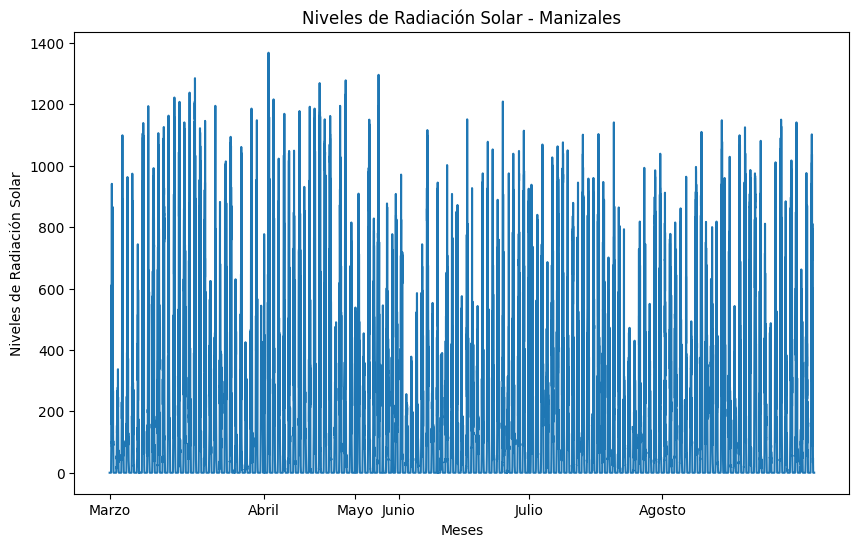

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Concatenar los datos de radiación solar para Manizales
datos_manizales = pd.concat([
    datos_concatenados_marzo_MA['Solar Rad.'],
    datos_concatenados_abril_MA['Solar Rad.'],
    datos_concatenados_mayo_MA['Solar Rad..1'],
    datos_concatenados_junio_MA['Solar Rad.'],
    datos_concatenados_julio_MA['Solar Rad.'],
    datos_concatenados_agosto_MA['Solar Rad.']
])

# Crear un índice continuo para los datos concatenados
indice_continuo = list(range(len(datos_manizales)))

# Obtener la cantidad de días por mes
dias_por_mes = [
    len(datos_concatenados_marzo_MA),
    len(datos_concatenados_abril_MA),
    len(datos_concatenados_mayo_MA),
    len(datos_concatenados_junio_MA),
    len(datos_concatenados_julio_MA),
    len(datos_concatenados_agosto_MA)
]

# Calcular la cantidad acumulativa de días para cada mes
dias_acumulados = [0] + [sum(dias_por_mes[:i+1]) for i in range(len(dias_por_mes))]

# Definir los nombres de los meses para usar en el gráfico
meses = ['Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto']

# Ajustar la cantidad de días acumulados
# Si se está excediendo, puedes considerar ajustar cómo se calculan estos valores

dias_acumulados = dias_acumulados[:len(meses)]

# Graficar los niveles de radiación solar en Manizales
plt.figure(figsize=(10, 6))
plt.plot(indice_continuo, datos_manizales)
plt.xticks(dias_acumulados, meses)  # Colocar etiquetas de meses en el eje x
plt.xlabel('Meses')
plt.ylabel('Niveles de Radiación Solar')
plt.title('Niveles de Radiación Solar - Manizales')
plt.show()


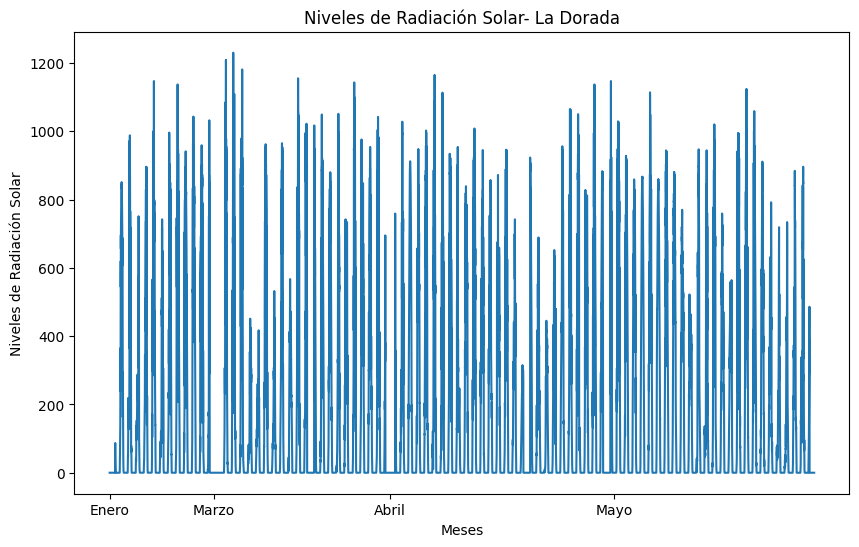

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Concatenar los datos de radiación solar para La Dorada
datos_dorada = pd.concat([
    datos_concatenados_enero_LD['Solar Rad.'],
    datos_concatenados_marzo_LD['Solar Rad.'],
    datos_concatenados_abril_LD['Solar Rad.'],
    datos_concatenados_mayo_LD['Solar Rad.']
])

# Crear un índice continuo para los datos concatenados
indice_continuo_dorada = list(range(len(datos_dorada)))

# Obtener la cantidad de días por mes
dias_por_mes_dorada = [
    len(datos_concatenados_enero_LD),
    len(datos_concatenados_marzo_LD),
    len(datos_concatenados_abril_LD),
    len(datos_concatenados_mayo_LD)
]

# Calcular la cantidad acumulativa de días para cada mes
dias_acumulados_dorada = [0] + [sum(dias_por_mes_dorada[:i+1]) for i in range(len(dias_por_mes_dorada))]

# Definir los nombres de los meses para usar en el gráfico
meses_dorada = ['Enero', 'Marzo', 'Abril', 'Mayo']

# Ajustar la cantidad de días acumulados
# Si se está excediendo, puedes considerar ajustar cómo se calculan estos valores
dias_acumulados_dorada = dias_acumulados_dorada[:len(meses_dorada)]

# Graficar los niveles de radiación solar en La Dorada
plt.figure(figsize=(10, 6))
plt.plot(indice_continuo_dorada, datos_dorada)
plt.xticks(dias_acumulados_dorada, meses_dorada)  # Colocar etiquetas de meses en el eje x
plt.xlabel('Meses')
plt.ylabel('Niveles de Radiación Solar')
plt.title('Niveles de Radiación Solar- La Dorada')
plt.show()


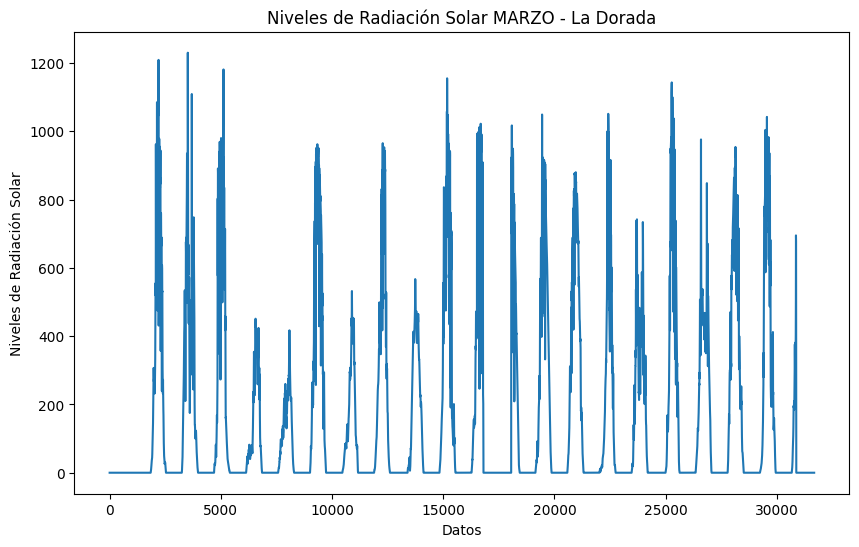

In [62]:
import matplotlib.pyplot as plt

# Seleccionar los datos de radiación solar de marzo en La Dorada
datos_marzo_dorada = datos_concatenados_marzo_LD['Solar Rad.']

# Crear un índice continuo para los datos de marzo
indice_continuo_marzo_dorada = list(range(len(datos_marzo_dorada)))

# Graficar los niveles de radiación solar de marzo en La Dorada
plt.figure(figsize=(10, 6))
plt.plot(indice_continuo_marzo_dorada, datos_marzo_dorada)
plt.xlabel('Datos')
plt.ylabel('Niveles de Radiación Solar')
plt.title('Niveles de Radiación Solar MARZO - La Dorada')
plt.show()


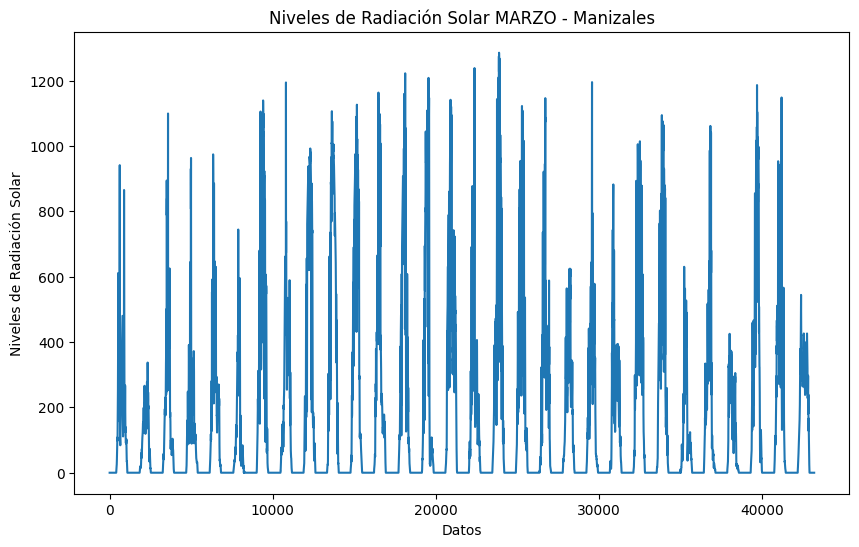

In [61]:
import matplotlib.pyplot as plt

# Seleccionar los datos de radiación solar de marzo en Manizales
datos_marzo_manizales = datos_concatenados_marzo_MA['Solar Rad.']

# Crear un índice continuo para los datos de marzo
indice_continuo_marzo_manizales = list(range(len(datos_marzo_manizales)))

# Graficar los niveles de radiación solar de marzo en Manizales
plt.figure(figsize=(10, 6))
plt.plot(indice_continuo_marzo_manizales, datos_marzo_manizales)
plt.xlabel('Datos')
plt.ylabel('Niveles de Radiación Solar')
plt.title('Niveles de Radiación Solar MARZO - Manizales')
plt.show()
